In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
import random
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# import shap
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('df_data (1).csv', sep=";")
data.head(5)

<ipython-input-88-c7226d78dde0>:1: DtypeWarning:

Columns (11,14,20,23,31,33,41,46,49) have mixed types. Specify dtype option on import or set low_memory=False.



,date,time,Жажда,кофеин,startAnswering,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,...,заметил провокатор,усиление движением,Продолжительность сна,чувствительность к звуку,чувствительность к свету,чувствительность к запахам,ГБ продолжение,Окончание боли,комментарий,какой триггер
0,2023-01-25,15:00,да,да,1674640902,нет,1,нет,нет,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-25,21:00,нет,нет,1674662469,нет,1,нет,нет,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-26,10:00,да,нет,1674710845,нет,1,да,нет,2,...,нет,да,06:30,да,нет,нет,NaN,NaN,NaN,NaN
3,2023-01-26,15:00,да,нет,1674727248,нет,1,NaN,нет,1,...,NaN,NaN,NaN,NaN,NaN,NaN,да,10:00,NaN,NaN
4,2023-01-26,21:00,нет,нет,1674749597,нет,1,нет,нет,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(data.id.unique())

34831

In [ ]:
data_not_import = data[["startAnswering", "id", "комментарий"]]
data = data.drop(columns=["startAnswering", "id", "комментарий"], axis=1)

In [ ]:
# data_not_import

In [ ]:
data.columns

Index(['date', 'time', 'Жажда', 'кофеин', 'Зевания', 'Тревога', 'ГБ новая',
       'Алкоголь', 'Депрессия', 'боль в шее', 'Сонливость', 'вегетатика',
       'подташнивает', 'Чувство голода', 'мочеиспускание', 'Напряжение глаз',
       'Воды достаточно?', 'сыр, шоко, цитрус', 'Ожидаете мигрень',
       'Работосособность', 'Хотелось шоколада', 'Чувство усталости',
       'Раздражительность', 'Были резкие запахи?', 'Пропуск приема пищи',
       'Чувствит кожи головы', 'Физическая ативность',
       'Больше звука чем обычно', 'Сложность концентрации',
       'Больше света, чем обычно', 'Чувствительность к звуку',
       'Чувствительность к свету', 'Чувствительность к запахам', 'Перелеты',
       'какой день', '1 день менструации', '% заполнения дневника', 'аура',
       'тошнота', 'ВАШ макс', 'Название', 'пульсация', 'Боль сейчас',
       'Начало боли', 'Качество сна', 'односторонняя', 'Обезболивающее',
       'Свежесть после сна', 'заметил провокатор', 'усиление движением',
       'Продол

In [ ]:
data['Чувствит кожи головы'].mode()

0    нет
Name: Чувствит кожи головы, dtype: object

In [ ]:
categorical_columns = ["Название", "какой день", "какой триггер", "односторонняя",
                       "сыр, шоко, цитрус", "Физическая ативность", "Продолжительность сна", "Начало боли", "Окончание боли"]
binary_columns = ['аура', 'Жажда', 'кофеин', 'Зевания', 'тошнота', 'ГБ новая', 'Алкоголь',
                  "Перелеты", "боль в шее","пульсация", "вегетатика", "подташнивает",
                  "Обезболивающее", "мочеиспускание", "Напряжение глаз", "Воды достаточно?", "1 день менструации", "Были резкие запахи?",
                  "заметил провокатор", "усиление движением", "Пропуск приема пищи", "Чувствит кожи головы", "Сложность концентрации",
                  "Больше света, чем обычно", "чувствительность к звуку", "чувствительность к свету", "чувствительность к запахам",
                  "ГБ продолжение", "Хотелось шоколада", "Больше звука чем обычно"]
quantitative_columns = ["Тревога", "ВАШ макс", "Депрессия", "Сонливость", "Чувство голода", "Ожидаете мигрень", "Работосособность",
                     "Чувство усталости", "Раздражительность", "Качество сна", "Свежесть после сна", "% заполнения дневника",
                        "Чувствительность к звуку", "Чувствительность к свету", "Чувствительность к запахам"
                        ]
time_data =['time']
date_data = ["date"]

In [ ]:
longest_string_index = data[['time', "Начало боли", "Продолжительность сна", "Окончание боли"]].apply(lambda x: ''.join(x.astype(str)), axis=1).str.len().idxmax()
longest_string = data.loc[longest_string_index, ['time', "Начало боли", "Продолжительность сна", "Окончание боли"]]
longest_string

time                                                                10:00
Начало боли                                                           NaN
Продолжительность сна    Сложно оценить, т.к просыпалась каждые 30-40 мин
Окончание боли                                                        NaN
Name: 33545, dtype: object

Отметим колонки с модой nan

In [ ]:
columns_with_nan_mode = [
    "Боль сейчас"
]

In [ ]:
data = data.drop(columns=["Боль сейчас"], axis=1)

Все ли колонки

In [ ]:
len(data.columns) - len(categorical_columns)-len(binary_columns)-len(quantitative_columns)-len(date_data)-len(time_data)

0

In [ ]:
data.shape

(34831, 56)

# Replace Nan

In [ ]:
mode_values = data.mode().iloc[0]

# Fill NaN values with mode values in all columns
data = data.fillna(mode_values)
data

,date,time,Жажда,кофеин,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,боль в шее,...,Свежесть после сна,заметил провокатор,усиление движением,Продолжительность сна,чувствительность к звуку,чувствительность к свету,чувствительность к запахам,ГБ продолжение,Окончание боли,какой триггер
0,2023-01-25,15:00,да,да,нет,1,нет,нет,1,да,...,3,нет,да,08:00,да,да,нет,да,20:00,Стресс
1,2023-01-25,21:00,нет,нет,нет,1,нет,нет,1,нет,...,3,нет,да,08:00,да,да,нет,да,20:00,Стресс
2,2023-01-26,10:00,да,нет,нет,1,да,нет,2,да,...,2,нет,да,06:30,да,нет,нет,да,20:00,Стресс
3,2023-01-26,15:00,да,нет,нет,1,нет,нет,1,да,...,3,нет,да,08:00,да,да,нет,да,10:00,Стресс
4,2023-01-26,21:00,нет,нет,нет,1,нет,нет,1,нет,...,3,нет,да,08:00,да,да,нет,да,20:00,Стресс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34826,2021-03-17,15:00,да,да,нет,3,да,да,3,нет,...,3,да,да,08:00,да,да,да,да,20:00,Вино
34827,2021-08-16,10:00,нет,да,нет,2,нет,нет,3,да,...,1.0,нет,да,07:00,да,нет,нет,нет,20:00,Стресс
34828,2021-08-16,21:00,да,да,да,3,да,нет,3,да,...,3,нет,да,08:00,да,да,нет,да,20:00,Стресс
34829,2021-08-18,15:00,да,да,нет,3,да,нет,3,да,...,3,нет,да,08:00,да,да,нет,да,20:00,Стресс


In [ ]:
data = data.drop(data.iloc[:, 27:58],axis = 1)

In [ ]:
categorical_columns = [
                       "сыр, шоко, цитрус", "Физическая ативность", ]
binary_columns = ['Жажда', 'кофеин', 'Зевания', 'ГБ новая', 'Алкоголь'
                  , "боль в шее", "вегетатика", "подташнивает",
                   "мочеиспускание", "Напряжение глаз", "Воды достаточно?", "Были резкие запахи?",
                    "Пропуск приема пищи", "Чувствит кожи головы",
                   "Хотелось шоколада"]
quantitative_columns = ["Тревога", "Депрессия", "Сонливость", "Чувство голода", "Ожидаете мигрень",
                        "Работосособность", "Чувство усталости", "Раздражительность"

                        ]
time_data =['time']
date_data = ["date"]

In [ ]:
data["Раздражительность"]

0        1
1        1
2        2
3        1
4        1
        ..
34826    3
34827    4
34828    2
34829    4
34830    4
Name: Раздражительность, Length: 34831, dtype: object

In [ ]:
data.columns

Index(['date', 'time', 'Жажда', 'кофеин', 'Зевания', 'Тревога', 'ГБ новая',
       'Алкоголь', 'Депрессия', 'боль в шее', 'Сонливость', 'вегетатика',
       'подташнивает', 'Чувство голода', 'мочеиспускание', 'Напряжение глаз',
       'Воды достаточно?', 'сыр, шоко, цитрус', 'Ожидаете мигрень',
       'Работосособность', 'Хотелось шоколада', 'Чувство усталости',
       'Раздражительность', 'Были резкие запахи?', 'Пропуск приема пищи',
       'Чувствит кожи головы', 'Физическая ативность'],
      dtype='object')

In [ ]:
len(data.columns) - len(categorical_columns)-len(binary_columns)-len(quantitative_columns)

2

In [ ]:
data = data.drop(columns=["Ожидаете мигрень"], axis=1)

In [ ]:
data.describe()

,Депрессия
count,34831.000000
mean,1.786914
std,1.055215
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


#EDA

Работа с бинарными признаками

In [ ]:
for column in binary_columns:
    data[column] = data[column].replace({'да': 1, 'нет': 0})

In [ ]:
data

,date,time,Жажда,кофеин,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,боль в шее,...,Воды достаточно?,"сыр, шоко, цитрус",Работосособность,Хотелось шоколада,Чувство усталости,Раздражительность,Были резкие запахи?,Пропуск приема пищи,Чувствит кожи головы,Физическая ативность
0,2023-01-25,15:00,1,1,0,1,0,0,1,1,...,1,нет,1,1,2,1,0,0,0,совсем нет
1,2023-01-25,21:00,0,0,0,1,0,0,1,0,...,1,нет,3,0,3,1,0,0,0,слабо
2,2023-01-26,10:00,1,0,0,1,1,0,2,1,...,1,нет,2,0,2,2,1,0,1,совсем нет
3,2023-01-26,15:00,1,0,0,1,0,0,1,1,...,1,нет,1,1,2,1,0,0,1,совсем нет
4,2023-01-26,21:00,0,0,0,1,0,0,1,0,...,1,нет,3,0,3,1,0,0,0,совсем нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34826,2021-03-17,15:00,1,1,0,3,1,1,3,0,...,1,да,3,1,5,3,0,1,0,совсем нет
34827,2021-08-16,10:00,0,1,0,2,0,0,3,1,...,1,да,3,1,4,4,0,1,0,слабо
34828,2021-08-16,21:00,1,1,1,3,1,0,3,1,...,1,да,4,1,5,2,0,0,1,слабо
34829,2021-08-18,15:00,1,1,0,3,1,0,3,1,...,1,да,3,0,4,4,0,0,0,слабо


Работа с данными временными

In [ ]:
for column in time_data:
    data[column] = pd.to_datetime(data[column], format='%H:%M')

for column in time_data:
    time_components = [f'{column}_hour', f'{column}_minute']

    data[time_components] = data[column].apply(lambda x: pd.Series([x.hour, x.minute]))
    data_encoded = pd.get_dummies(data, columns=time_components)

In [ ]:
data_encoded = data_encoded.drop(columns=["date", "time"], axis=1)

In [ ]:
data_encoded

,Жажда,кофеин,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,боль в шее,Сонливость,вегетатика,...,Чувство усталости,Раздражительность,Были резкие запахи?,Пропуск приема пищи,Чувствит кожи головы,Физическая ативность,time_hour_10,time_hour_15,time_hour_21,time_minute_0
0,1,1,0,1,0,0,1,1,3,0,...,2,1,0,0,0,совсем нет,0,1,0,1
1,0,0,0,1,0,0,1,0,3,0,...,3,1,0,0,0,слабо,0,0,1,1
2,1,0,0,1,1,0,2,1,2,1,...,2,2,1,0,1,совсем нет,1,0,0,1
3,1,0,0,1,0,0,1,1,2,1,...,2,1,0,0,1,совсем нет,0,1,0,1
4,0,0,0,1,0,0,1,0,3,0,...,3,1,0,0,0,совсем нет,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34826,1,1,0,3,1,1,3,0,2,0,...,5,3,0,1,0,совсем нет,0,1,0,1
34827,0,1,0,2,0,0,3,1,4,0,...,4,4,0,1,0,слабо,1,0,0,1
34828,1,1,1,3,1,0,3,1,4,1,...,5,2,0,0,1,слабо,0,0,1,1
34829,1,1,0,3,1,0,3,1,5,0,...,4,4,0,0,0,слабо,0,1,0,1


Работа с категориальными признаками: Пробуем One hot encoding

In [ ]:
data.head(5)

,date,time,Жажда,кофеин,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,боль в шее,...,Работосособность,Хотелось шоколада,Чувство усталости,Раздражительность,Были резкие запахи?,Пропуск приема пищи,Чувствит кожи головы,Физическая ативность,time_hour,time_minute
0,2023-01-25,1900-01-01 15:00:00,1,1,0,1,0,0,1,1,...,1,1,2,1,0,0,0,совсем нет,15,0
1,2023-01-25,1900-01-01 21:00:00,0,0,0,1,0,0,1,0,...,3,0,3,1,0,0,0,слабо,21,0
2,2023-01-26,1900-01-01 10:00:00,1,0,0,1,1,0,2,1,...,2,0,2,2,1,0,1,совсем нет,10,0
3,2023-01-26,1900-01-01 15:00:00,1,0,0,1,0,0,1,1,...,1,1,2,1,0,0,1,совсем нет,15,0
4,2023-01-26,1900-01-01 21:00:00,0,0,0,1,0,0,1,0,...,3,0,3,1,0,0,0,совсем нет,21,0


Проверка на бесконечные значения

In [ ]:
for column in data.columns:
    if np.issubdtype(data[column].dtype, np.number):
        infinite_values = np.isinf(data[column]).sum()
        print(f"Column '{column}' has {infinite_values} infinite values.")

Column 'Жажда' has 0 infinite values.
Column 'Зевания' has 0 infinite values.
Column 'ГБ новая' has 0 infinite values.
Column 'Депрессия' has 0 infinite values.
Column 'боль в шее' has 0 infinite values.
Column 'вегетатика' has 0 infinite values.
Column 'подташнивает' has 0 infinite values.
Column 'мочеиспускание' has 0 infinite values.
Column 'Напряжение глаз' has 0 infinite values.
Column 'Воды достаточно?' has 0 infinite values.
Column 'Хотелось шоколада' has 0 infinite values.
Column 'Были резкие запахи?' has 0 infinite values.
Column 'Пропуск приема пищи' has 0 infinite values.
Column 'Чувствит кожи головы' has 0 infinite values.
Column 'time_hour' has 0 infinite values.
Column 'time_minute' has 0 infinite values.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34831 entries, 0 to 34830
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  34831 non-null  object        
 1   time                  34831 non-null  datetime64[ns]
 2   Жажда                 34831 non-null  int64         
 3   кофеин                34831 non-null  object        
 4   Зевания               34831 non-null  int64         
 5   Тревога               34831 non-null  object        
 6   ГБ новая              34831 non-null  int64         
 7   Алкоголь              34831 non-null  object        
 8   Депрессия             34831 non-null  int64         
 9   боль в шее            34831 non-null  int64         
 10  Сонливость            34831 non-null  object        
 11  вегетатика            34831 non-null  int64         
 12  подташнивает          34831 non-null  int64         
 13  Чувство голода  

In [ ]:
data = data.drop(columns=data.select_dtypes(include='datetime64').columns, axis=1)

In [ ]:
df_encoded = pd.get_dummies(data, columns=categorical_columns)

In [ ]:
df_encoded

,date,Жажда,кофеин,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,боль в шее,Сонливость,...,"сыр, шоко, цитрус_да","сыр, шоко, цитрус_нет",Физическая ативность_Слабо,Физическая ативность_да,Физическая ативность_интенсивная,Физическая ативность_интенсивно,Физическая ативность_нет,Физическая ативность_слабо,Физическая ативность_совсем нет,Физическая ативность_средне
0,2023-01-25,1,1,0,1,0,0,1,1,3,...,0,1,0,0,0,0,0,0,1,0
1,2023-01-25,0,0,0,1,0,0,1,0,3,...,0,1,0,0,0,0,0,1,0,0
2,2023-01-26,1,0,0,1,1,0,2,1,2,...,0,1,0,0,0,0,0,0,1,0
3,2023-01-26,1,0,0,1,0,0,1,1,2,...,0,1,0,0,0,0,0,0,1,0
4,2023-01-26,0,0,0,1,0,0,1,0,3,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34826,2021-03-17,1,1,0,3,1,1,3,0,2,...,1,0,0,0,0,0,0,0,1,0
34827,2021-08-16,0,1,0,2,0,0,3,1,4,...,1,0,0,0,0,0,0,1,0,0
34828,2021-08-16,1,1,1,3,1,0,3,1,4,...,1,0,0,0,0,0,0,1,0,0
34829,2021-08-18,1,1,0,3,1,0,3,1,5,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34831 entries, 0 to 34830
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   date                              34831 non-null  object
 1   Жажда                             34831 non-null  int64 
 2   кофеин                            34831 non-null  object
 3   Зевания                           34831 non-null  int64 
 4   Тревога                           34831 non-null  object
 5   ГБ новая                          34831 non-null  int64 
 6   Алкоголь                          34831 non-null  object
 7   Депрессия                         34831 non-null  int64 
 8   боль в шее                        34831 non-null  int64 
 9   Сонливость                        34831 non-null  object
 10  вегетатика                        34831 non-null  int64 
 11  подташнивает                      34831 non-null  int64 
 12  Чувство голода    

         date  Жажда кофеин  Зевания Тревога  ГБ новая Алкоголь  Депрессия  \
0  2023-01-25      1      1        0       1         0        0          1   
1  2023-01-25      0      0        0       1         0        0          1   
2  2023-01-26      1      0        0       1         1        0          2   
3  2023-01-26      1      0        0       1         0        0          1   
4  2023-01-26      0      0        0       1         0        0          1   

   боль в шее Сонливость  ...  Работосособность  Хотелось шоколада  \
0           1          3  ...                 1                  1   
1           0          3  ...                 3                  0   
2           1          2  ...                 2                  0   
3           1          2  ...                 1                  1   
4           0          3  ...                 3                  0   

  Чувство усталости  Раздражительность  Были резкие запахи?  \
0                 2                  1         

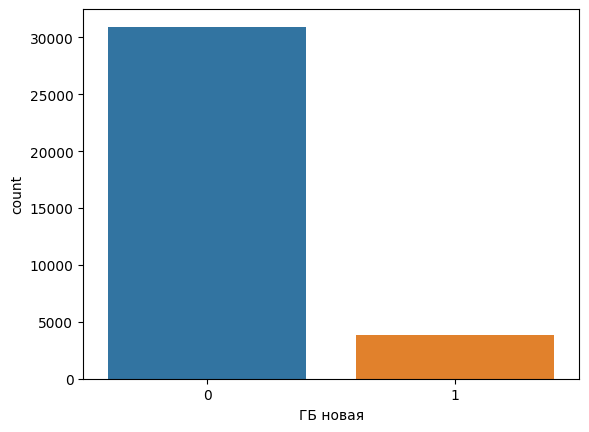

In [ ]:
# Изучение общей информации о данных
print(data.head())  # Вывод первых нескольких строк данных
print(data.info())  # Вывод общей информации о данных (типы данных, пропущенные значения и т.д.)

sns.countplot(x='ГБ новая', data=df_encoded )
plt.show()

# Corr

<ipython-input-35-1f392e28ca90>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


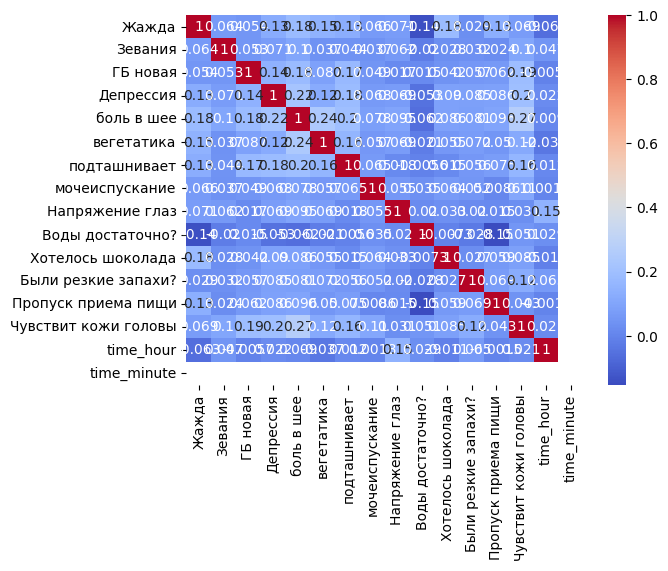

In [ ]:
# Исследование корреляции между признаками
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Set a threshold to select more accurately

<ipython-input-36-2d56eefb46b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


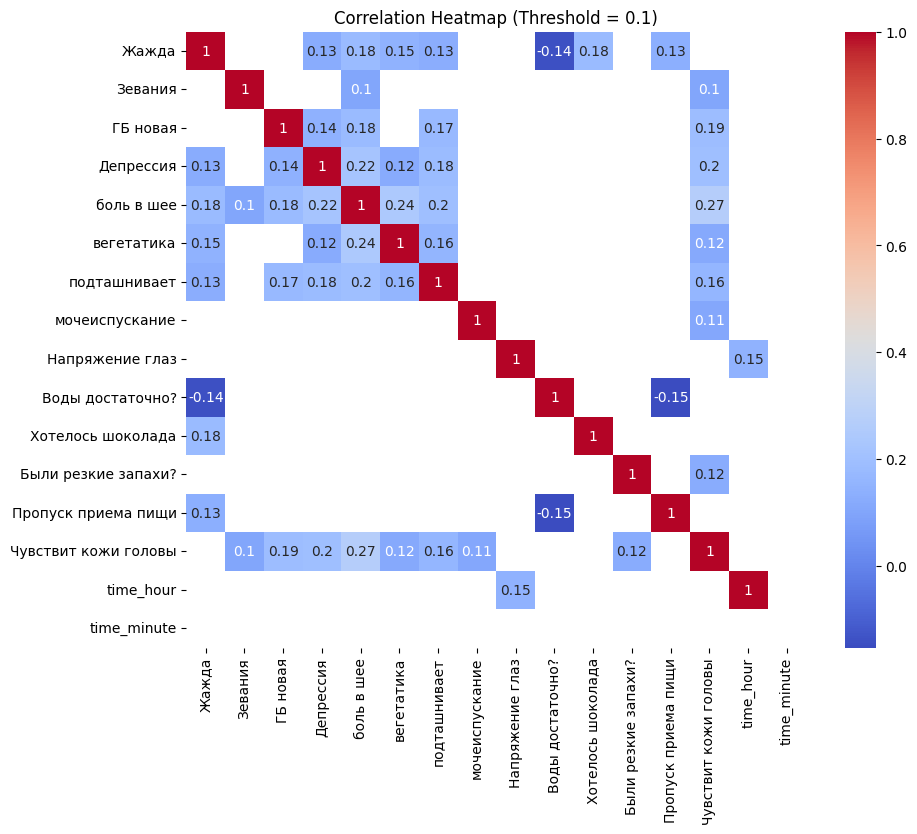

In [ ]:
correlation_matrix = data.corr()

# Задание порогового значения
threshold = 0.1

mask = np.abs(correlation_matrix) < threshold
correlation_matrix = correlation_matrix.mask(mask)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Heatmap (Threshold = {threshold})")
plt.show()

More fancy inter plot

<ipython-input-37-68b4410610ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


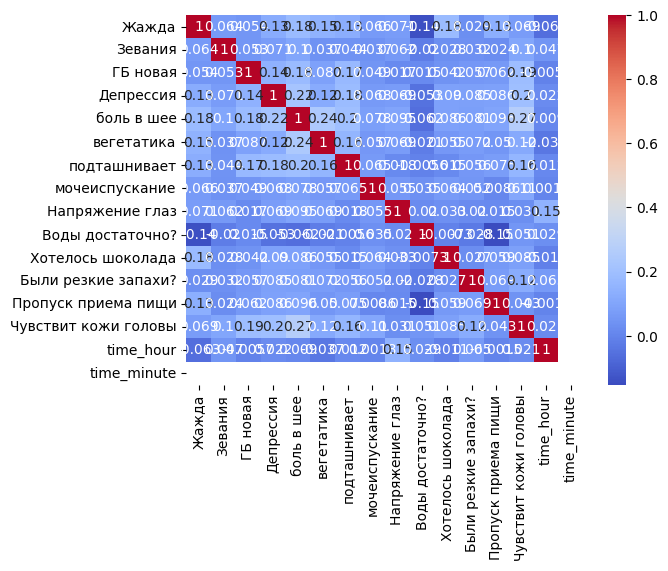

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Convert the seaborn figure to plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis'))

# Set layout properties
fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    width=800,
    height=800,
    autosize=False)

# Show the interactive plot
fig.show()

# Primary Feature Importance

Выделение наиболее значимых признаков

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34831 entries, 0 to 34830
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   date                              34831 non-null  object
 1   Жажда                             34831 non-null  int64 
 2   кофеин                            34831 non-null  object
 3   Зевания                           34831 non-null  int64 
 4   Тревога                           34831 non-null  object
 5   ГБ новая                          34831 non-null  int64 
 6   Алкоголь                          34831 non-null  object
 7   Депрессия                         34831 non-null  int64 
 8   боль в шее                        34831 non-null  int64 
 9   Сонливость                        34831 non-null  object
 10  вегетатика                        34831 non-null  int64 
 11  подташнивает                      34831 non-null  int64 
 12  Чувство голода    

In [ ]:
df_encoded = df_encoded.drop(columns=["date"], axis=1)

In [ ]:
string_columns = df_encoded.select_dtypes(include='object').columns
string_columns

Index(['кофеин', 'Тревога', 'Алкоголь', 'Сонливость', 'Чувство голода',
       'Работосособность', 'Чувство усталости', 'Раздражительность'],
      dtype='object')

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=string_columns)

In [ ]:
df_encoded

,Жажда,Зевания,ГБ новая,Депрессия,боль в шее,вегетатика,подташнивает,мочеиспускание,Напряжение глаз,Воды достаточно?,...,Раздражительность_3,Раздражительность_4,Раздражительность_5,Раздражительность_1,Раздражительность_2,Раздражительность_3,Раздражительность_4,Раздражительность_5,Раздражительность_да,Раздражительность_нет
0,1,0,0,1,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,2,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34826,1,0,1,3,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
34827,0,0,0,3,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
34828,1,1,1,3,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
34829,1,0,1,3,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.columns[df_encoded.isna().any()].tolist()

[]

In [ ]:
# df_encoded = df_encoded.drop(columns=["Боль сейчас"], axis=1)

Отбираем наиболее важные признаки по хи-квадрат

In [ ]:
# Выделение наиболее значимых признаков с использованием метода SelectKBest и статистики хи-квадрат
X = df_encoded.drop('ГБ новая', axis=1)
y = df_encoded['ГБ новая']

k_best = SelectKBest(score_func=chi2, k=40)  #  количество наиболее значимых признаков (k) для выделения
X_best = k_best.fit_transform(X, y)
# Получение индексов наиболее значимых признаков
mask = k_best.get_support()  # Булевый массив, указывающий, какие признаки были выбраны
best_features = X.columns[mask]  # Имена наиболее значимых признаков

print("Наиболее значимые признаки:", best_features)

Наиболее значимые признаки: Index(['Жажда', 'Зевания', 'Депрессия', 'боль в шее', 'вегетатика',
       'подташнивает', 'мочеиспускание', 'Хотелось шоколада',
       'Были резкие запахи?', 'Пропуск приема пищи', 'Чувствит кожи головы',
       'Тревога_1', 'Тревога_3', 'Тревога_4', 'Тревога_5', 'Сонливость_1',
       'Сонливость_4', 'Сонливость_5', 'Сонливость_1', 'Сонливость_3',
       'Сонливость_4', 'Работосособность_1', 'Работосособность_3',
       'Работосособность_4', 'Работосособность_5', 'Работосособность_1',
       'Работосособность_3', 'Работосособность_4', 'Работосособность_5',
       'Чувство усталости_1', 'Чувство усталости_3', 'Чувство усталости_4',
       'Чувство усталости_5', 'Раздражительность_1', 'Раздражительность_3',
       'Раздражительность_4', 'Раздражительность_5', 'Раздражительность_1',
       'Раздражительность_3', 'Раздражительность_4'],
      dtype='object')


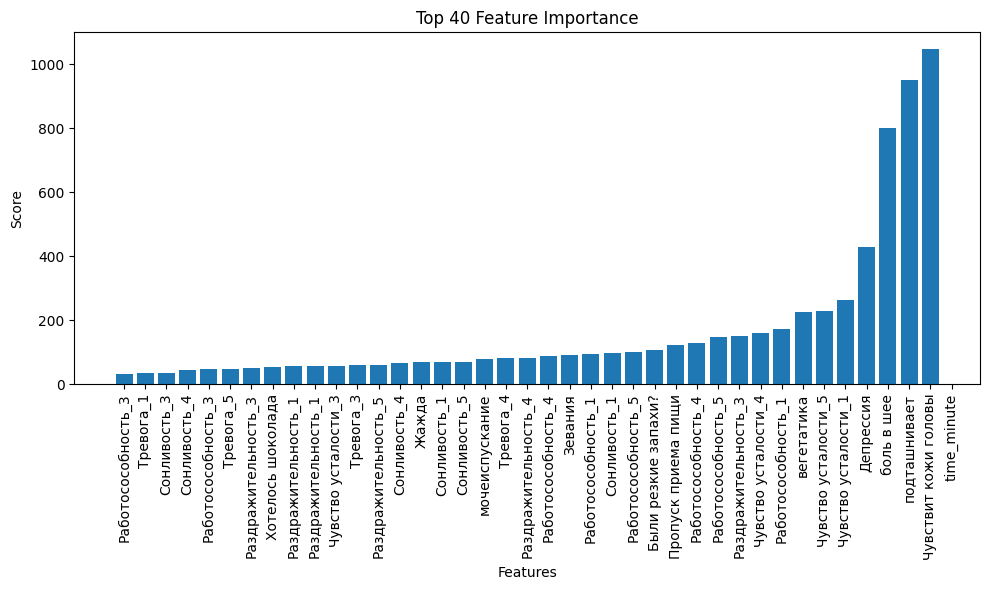

<Figure size 640x480 with 0 Axes>

In [ ]:
scores = k_best.scores_

top_20_indices = np.argsort(scores)[-40:]

top_20_scores = scores[top_20_indices]
top_20_features = X.columns[top_20_indices]

plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(top_20_scores)), top_20_scores)
plt.xticks(np.arange(len(top_20_scores)), top_20_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Top 40 Feature Importance')
plt.tight_layout()
plt.show()
plt.savefig("Top 40 Feature Importance")

# ML подход

Собираем тренировочную и тестовую выборки

In [ ]:
X = df_encoded.drop('ГБ новая', axis=1)
y = df_encoded['ГБ новая']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (27864, 95) (27864,)
Testing set shape: (6967, 95) (6967,)


Нормализация (для lstm только)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

Тестируем алгоритмы

LogisticRegression

In [ ]:
model_lr = LogisticRegression(max_iter=1000)

model_lr.fit(X_train, y_train)

predictions_lr = model_lr.predict(X_test)

Random Forest

In [ ]:
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

Support Vector Machines (SVM)

In [ ]:
# model_svm = SVC()


# model_svm.fit(X_train, y_train)


# predictions_svm = model_svm.predict(X_test)

Gradient Boosting

In [ ]:
model_gb = GradientBoostingClassifier()

model_gb.fit(X_train, y_train)

predictions_gb = model_gb.predict(X_test)

K-Nearest Neighbors (KNN)

In [ ]:
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)

predictions_knn = model_knn.predict(X_test)

Сравнение простых алгоритмов

In [ ]:
report_lr = classification_report(y_test, predictions_lr)
print("Logistic Regression:")
print(report_lr)

report_rf = classification_report(y_test, predictions_rf)
print("Random Forest:")
print(report_rf)

# # report_svm = classification_report(y_test, predictions_svm)
# print("Support Vector Machines:")
# print(report_svm)

report_gb = classification_report(y_test, predictions_gb)
print("Gradient Boosting:")
print(report_gb)

report_knn = classification_report(y_test, predictions_knn)
print("K-Nearest Neighbors:")
print(report_knn)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6170
           1       0.51      0.05      0.09       797

    accuracy                           0.89      6967
   macro avg       0.70      0.52      0.51      6967
weighted avg       0.85      0.89      0.84      6967

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6170
           1       0.32      0.02      0.04       797

    accuracy                           0.88      6967
   macro avg       0.60      0.51      0.49      6967
weighted avg       0.82      0.88      0.84      6967

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6170
           1       0.60      0.02      0.04       797

    accuracy                           0.89      6967
   macro avg       0.74      0.51      0.49      6967
weighted avg       

Проблема - несбалансированные классы и алгоритмы переобучаются

ROC-AUC анализ

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



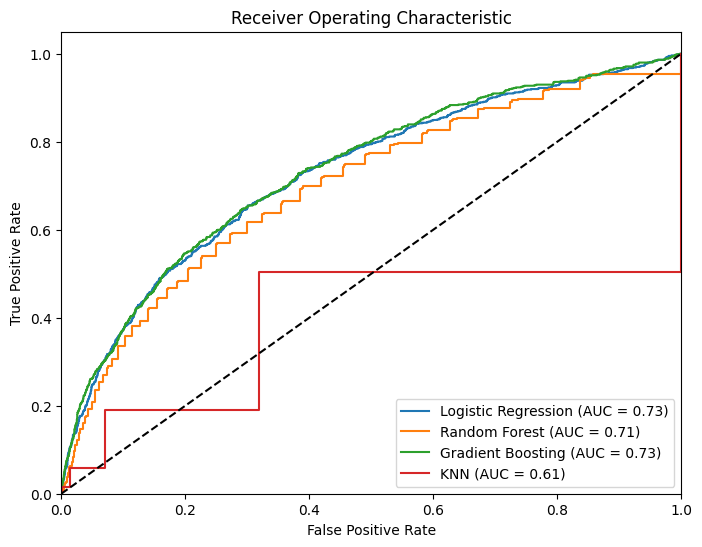

In [ ]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_svm = SVC(probability=True)  # Set probability=True for SVC to enable predict_proba
model_gb = GradientBoostingClassifier()
model_knn = KNeighborsClassifier()

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

probs_lr = model_lr.predict_proba(X_test)[:, 1]
probs_rf = model_rf.predict_proba(X_test)[:, 1]
probs_svm = model_svm.predict_proba(X_test)[:, 1]
probs_gb = model_gb.predict_proba(X_test)[:, 1]
probs_knn = model_knn.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probs_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, probs_gb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)

roc_auc_lr = roc_auc_score(y_test, probs_lr)
roc_auc_rf = roc_auc_score(y_test, probs_rf)
roc_auc_svm = roc_auc_score(y_test, probs_svm)
roc_auc_gb = roc_auc_score(y_test, probs_gb)
roc_auc_knn = roc_auc_score(y_test, probs_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', drawstyle='steps-post')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', drawstyle='steps-post')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', drawstyle='steps-post')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', drawstyle='steps-post')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

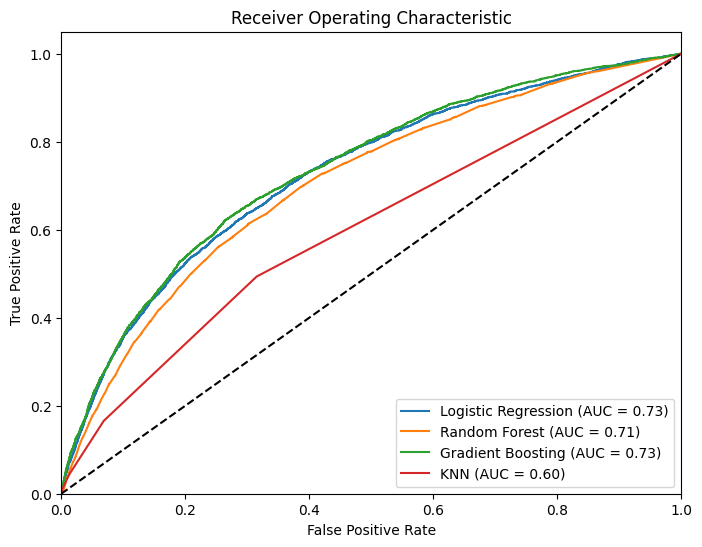

In [ ]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
# model_svm = SVC(probability=True)  # Set probability=True for SVC to enable predict_proba
model_gb = GradientBoostingClassifier()
model_knn = KNeighborsClassifier()

probs_lr = cross_val_predict(model_lr, X_train, y_train, cv=5, method='predict_proba')[:, 1]
probs_rf = cross_val_predict(model_rf, X_train, y_train, cv=5, method='predict_proba')[:, 1]
# probs_svm = cross_val_predict(model_svm, X_train, y_train, cv=5, method='predict_proba')[:, 1]
probs_gb = cross_val_predict(model_gb, X_train, y_train, cv=5, method='predict_proba')[:, 1]
probs_knn = cross_val_predict(model_knn, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, probs_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, probs_rf)
# fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, probs_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_train, probs_gb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, probs_knn)

roc_auc_lr = roc_auc_score(y_train, probs_lr)
roc_auc_rf = roc_auc_score(y_train, probs_rf)
# roc_auc_svm = roc_auc_score(y_train, probs_svm)
roc_auc_gb = roc_auc_score(y_train, probs_gb)
roc_auc_knn = roc_auc_score(y_train, probs_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
# plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 14.6 MB/s eta 0:00:00


In [ ]:
import shap

100%|===================| 13933/13934 [30:24<00:00]       

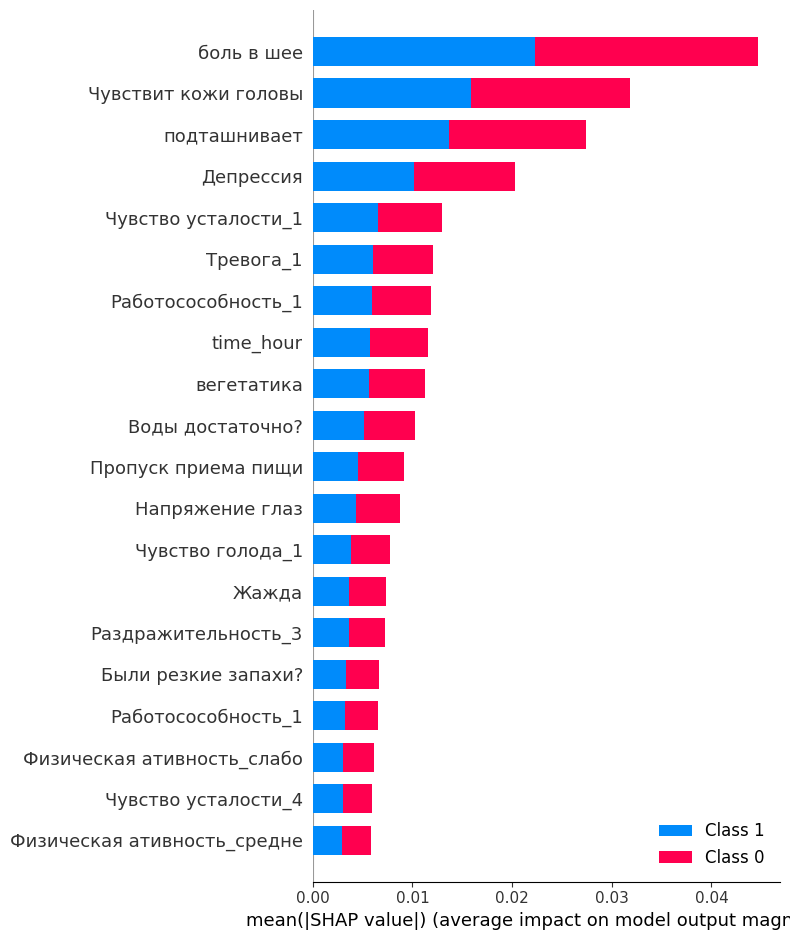

In [ ]:
# Create the Random Forest model
model_rf = RandomForestClassifier()

# Perform cross-validation and get predicted probabilities
probs_rf = cross_val_predict(model_rf, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Fit the model on the entire training data
model_rf.fit(X_train, y_train)

# Create an explainer object
explainer = shap.Explainer(model_rf, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)

# compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

100%|===================| 13928/13934 [30:08<00:00]       

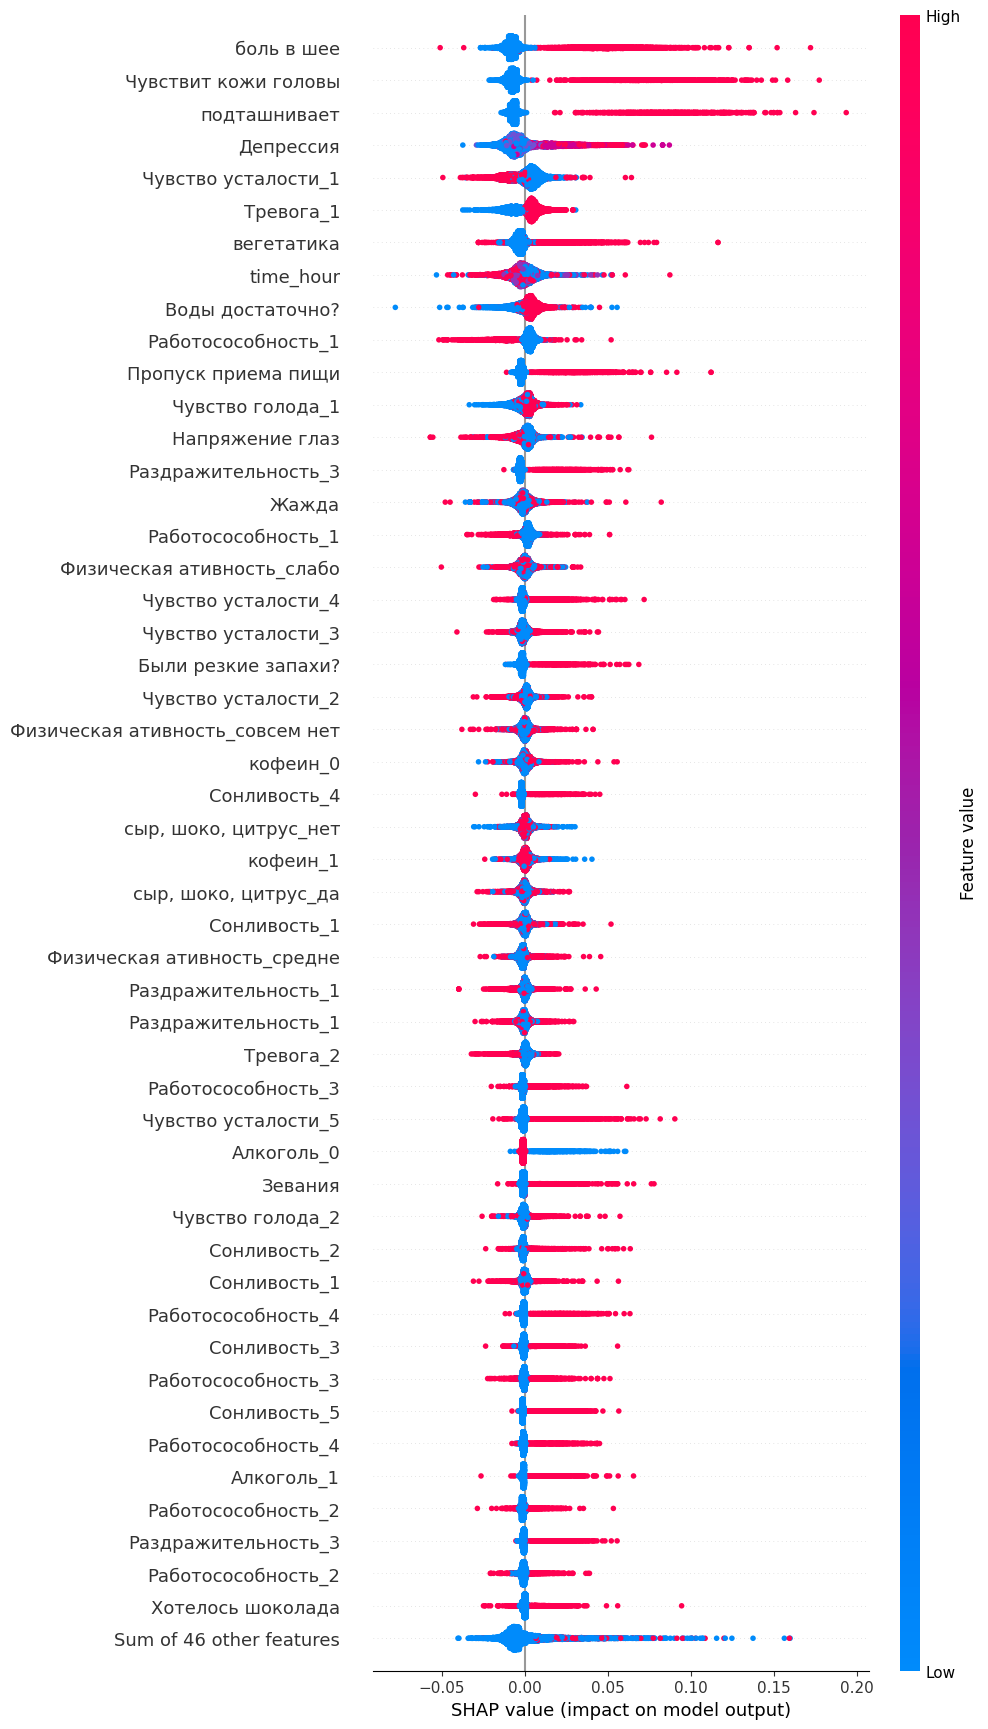

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1],max_display=50)

In [ ]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
# model_svm = SVC(probability=True)  # Set probability=True for SVC to enable predict_proba
model_gb = GradientBoostingClassifier()
model_knn = KNeighborsClassifier()

probs_lr = cross_val_predict(model_lr, X_train, y_train, cv=5, method='predict_proba')[:, 1]
probs_rf = cross_val_predict(model_rf, X_train, y_train, cv=5, method='predict_proba')[:, 1]
# probs_svm = cross_val_predict(model_svm, X_train, y_train, cv=5, method='predict_proba')[:, 1]
probs_gb = cross_val_predict(model_gb, X_train, y_train, cv=5, method='predict_proba')[:, 1]
probs_knn = cross_val_predict(model_knn, X_train, y_train, cv=5, method='predict_proba')[:, 1]


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, probs_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, probs_rf)
# fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, probs_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_train, probs_gb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, probs_knn)


roc_auc_lr = roc_auc_score(y_train, probs_lr)
roc_auc_rf = roc_auc_score(y_train, probs_rf)
# roc_auc_svm = roc_auc_score(y_train, probs_svm)
roc_auc_gb = roc_auc_score(y_train, probs_gb)
roc_auc_knn = roc_auc_score(y_train, probs_knn)


fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr_lr, y=tpr_lr, mode='lines', name=f'Logistic Regression (AUC = {roc_auc_lr:.2f})'))
fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'Random Forest (AUC = {roc_auc_rf:.2f})'))
# fig.add_trace(go.Scatter(x=fpr_svm, y=tpr_svm, mode='lines', name=f'SVM (AUC = {roc_auc_svm:.2f})'))
fig.add_trace(go.Scatter(x=fpr_gb, y=tpr_gb, mode='lines', name=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})'))
fig.add_trace(go.Scatter(x=fpr_knn, y=tpr_knn, mode='lines', name=f'KNN (AUC = {roc_auc_knn:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance', line=dict(dash='dash')))

fig.update_layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    legend=dict(x=0.7, y=0.3)
)

fig.show()


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Текущие результаты по фичам

Из статьи:

Swellings premonitory

Hours of sleep

Peak headache intensity

Average headache intensity

Daily Functioning

Headache today

Feeling cold premonitory

Session time

Cravings premonitory

Mean HR

Yawning premonitory

Mood change premonitory

Feeling energized premonitory

Hours of workout

Taken abortive medication

 Minimum HR


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


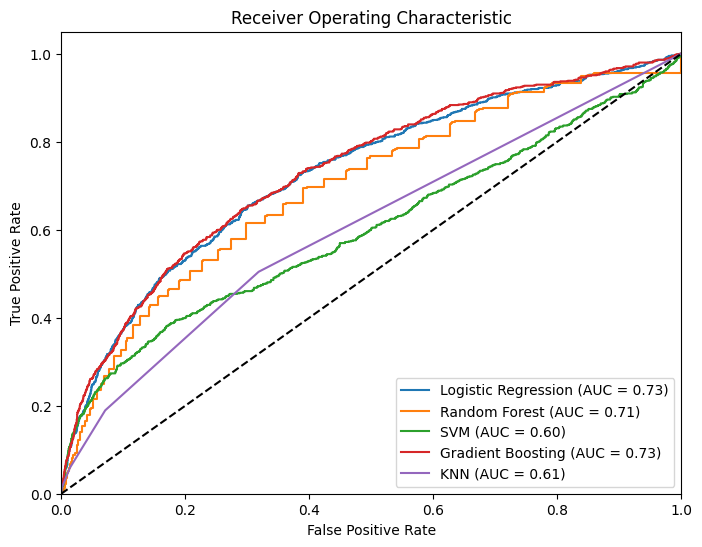

In [ ]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_svm = SVC(probability=True)  # Set probability=True for SVC to enable predict_proba
model_gb = GradientBoostingClassifier()
model_knn = KNeighborsClassifier()

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_knn.fit(X_train, y_train)


probs_lr = model_lr.predict_proba(X_test)[:, 1]
probs_rf = model_rf.predict_proba(X_test)[:, 1]
probs_svm = model_svm.predict_proba(X_test)[:, 1]
probs_gb = model_gb.predict_proba(X_test)[:, 1]
probs_knn = model_knn.predict_proba(X_test)[:, 1]


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probs_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, probs_gb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)



roc_auc_lr = roc_auc_score(y_test, probs_lr)
roc_auc_rf = roc_auc_score(y_test, probs_rf)
roc_auc_svm = roc_auc_score(y_test, probs_svm)
roc_auc_gb = roc_auc_score(y_test, probs_gb)
roc_auc_knn = roc_auc_score(y_test, probs_knn)


plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', drawstyle='steps-post')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', drawstyle='steps-post')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', drawstyle='steps-post')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', drawstyle='steps-post')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_svm = SVC(probability=True)  # Set probability=True for SVC to enable predict_proba
model_gb = GradientBoostingClassifier()
model_knn = KNeighborsClassifier()


probs_lr = cross_val_predict(model_lr, X_test, y_test, cv=5, method='predict_proba')[:, 1]
probs_rf = cross_val_predict(model_rf, X_test, y_test, cv=5, method='predict_proba')[:, 1]
probs_svm = cross_val_predict(model_svm, X_train, y_train, cv=5, method='predict_proba')[:, 1]
probs_gb = cross_val_predict(model_gb, X_test, y_test, cv=5, method='predict_proba')[:, 1]
probs_knn = cross_val_predict(model_knn, X_test, y_test, cv=5, method='predict_proba')[:, 1]


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train, probs_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, probs_gb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)


roc_auc_lr = roc_auc_score(y_test, probs_lr)
roc_auc_rf = roc_auc_score(y_test, probs_rf)
roc_auc_svm = roc_auc_score(y_train, probs_svm)
roc_auc_gb = roc_auc_score(y_test, probs_gb)
roc_auc_knn = roc_auc_score(y_test, probs_knn)


fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr_lr, y=tpr_lr, mode='lines', name=f'Logistic Regression (AUC = {roc_auc_lr:.2f})'))
fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'Random Forest (AUC = {roc_auc_rf:.2f})'))
fig.add_trace(go.Scatter(x=fpr_svm, y=tpr_svm, mode='lines', name=f'SVM (AUC = {roc_auc_svm:.2f})'))
fig.add_trace(go.Scatter(x=fpr_gb, y=tpr_gb, mode='lines', name=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})'))
fig.add_trace(go.Scatter(x=fpr_knn, y=tpr_knn, mode='lines', name=f'KNN (AUC = {roc_auc_knn:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance', line=dict(dash='dash')))

fig.update_layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    legend=dict(x=0.7, y=0.3)
)

fig.show()


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


#LSTM and HMM

LSTM is not convenient

Epoch [1/100], Loss: 0.6050, ROC AUC: 0.5000
Epoch [2/100], Loss: 0.3520, ROC AUC: 0.5000
Epoch [3/100], Loss: 0.3498, ROC AUC: 0.5000
Epoch [4/100], Loss: 0.3490, ROC AUC: 0.5000
Epoch [5/100], Loss: 0.3493, ROC AUC: 0.5000
Epoch [6/100], Loss: 0.3494, ROC AUC: 0.5000
Epoch [7/100], Loss: 0.3495, ROC AUC: 0.5000
Epoch [8/100], Loss: 0.3496, ROC AUC: 0.5000
Epoch [9/100], Loss: 0.3495, ROC AUC: 0.5000
Epoch [10/100], Loss: 0.3500, ROC AUC: 0.5000
Epoch [11/100], Loss: 0.3498, ROC AUC: 0.5000
Epoch [12/100], Loss: 0.3493, ROC AUC: 0.5000
Epoch [13/100], Loss: 0.3491, ROC AUC: 0.5000
Epoch [14/100], Loss: 0.3497, ROC AUC: 0.5000
Epoch [15/100], Loss: 0.3495, ROC AUC: 0.5000
Epoch [16/100], Loss: 0.3497, ROC AUC: 0.5000
Epoch [17/100], Loss: 0.3496, ROC AUC: 0.5000
Epoch [18/100], Loss: 0.3492, ROC AUC: 0.5000
Epoch [19/100], Loss: 0.3496, ROC AUC: 0.5000
Epoch [20/100], Loss: 0.3494, ROC AUC: 0.5000
Epoch [21/100], Loss: 0.3491, ROC AUC: 0.5000
Epoch [22/100], Loss: 0.3493, ROC AUC: 0.50

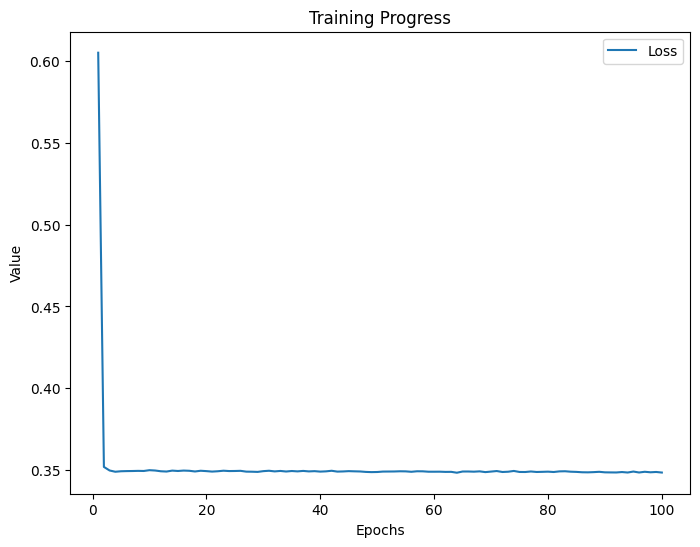

Accuracy: 0.8856035596382948


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score

# Check for the availability of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float().to(device)
X_test_tensor = torch.from_numpy(X_test.values).float().to(device)
y_train_tensor = torch.from_numpy(y_train.values).long().to(device)
y_test_tensor = torch.from_numpy(y_test.values).long().to(device)

# Reshape input tensors to have dimensions (batch_size, sequence_length, input_size)
X_train_tensor = X_train_tensor.unsqueeze(dim=2)
X_test_tensor = X_test_tensor.unsqueeze(dim=2)

# Create a TensorDataset and DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, bidirectional=False, dropout=0.0):
        super(LSTMModel, self).__init__()
        self.num_layers = num_layers
        self.bidirectional = bidirectional
        self.hidden_size = hidden_size
        self.dropout = dropout

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, output_size)
        self.dropout_layer = nn.Dropout(dropout)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout_layer(out[:, -1, :])
        out = self.fc(out)
        return out

# Initialize the model
input_size = X_train_tensor.size(2)
hidden_size = 64
num_layers = 2  # Increase the number of LSTM layers
output_size = 1
bidirectional = True  # Use bidirectional LSTM
dropout = 0.2  # Add dropout regularization

model_lstm = LSTMModel(input_size, hidden_size, num_layers, output_size, bidirectional=bidirectional, dropout=dropout)
model_lstm.to(device)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.00001)

# Train the model and track the loss
# Train the model and track the loss
num_epochs = 100
losses = []
roc_auc_scores = []

model_lstm.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    model_lstm.train()  # Set the model to training mode
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_lstm(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)

    # Calculate ROC AUC score on the test set
    model_lstm.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y_pred_tensor = torch.round(torch.sigmoid(model_lstm(X_test_tensor)))
        y_pred_tensor = y_pred_tensor.cpu()
        y_pred_np = y_pred_tensor.numpy()
        y_test_np = y_test_tensor.cpu().numpy()

    roc_auc = roc_auc_score(y_test_np, y_pred_np)
    roc_auc_scores.append(roc_auc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, ROC AUC: {roc_auc:.4f}")


# Plot the loss and ROC AUC curves
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Progress')
plt.legend()
plt.show()

# Evaluate the model
model_lstm.eval()
with torch.no_grad():
    model_lstm.training = False  # Set evaluation mode for final predictions
    y_pred_tensor = torch.round(torch.sigmoid(model_lstm(X_test_tensor)))
    y_pred_lstm = y_pred_tensor.cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()

accuracy = accuracy_score(y_test_np, y_pred_lstm)
print("Accuracy:", accuracy)


LSTM is worse than ml alg

# Time series with LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

Data prep

In [ ]:
data = df_encoded[features + [target]].values

# Perform Min-Max scaling on the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the window size for creating input sequences
window_size = 5

# Create input sequences and corresponding target values
sequences = []
targets = []
for i in range(window_size, len(scaled_data)):
    sequences.append(scaled_data[i - window_size:i, :-1])  # Input sequence
    targets.append(scaled_data[i, -1])  # Corresponding target value

# Convert sequences and targets to numpy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# Print the shape of sequences and targets
print("Sequences shape:", sequences.shape)
print("Targets shape:", targets.shape)

In [ ]:
sequences_tensor = torch.Tensor(sequences)
targets_tensor = torch.Tensor(targets)

# Define the train and test dataset sizes
train_size = int(0.8 * len(sequences_tensor))
test_size = len(sequences_tensor) - train_size

# Split the data into train and test datasets
train_data = TensorDataset(sequences_tensor[:train_size], targets_tensor[:train_size])
test_data = TensorDataset(sequences_tensor[train_size:], targets_tensor[train_size:])

# Define the batch size for training
batch_size = 32

# Create data loaders for train and test datasets
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Define the LSTM model architecture
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Set the random seed for reproducibility
torch.manual_seed(42)

# Define the hyperparameters
input_size = sequences.shape[2]  # Number of features
hidden_size = 64
output_size = 1
num_epochs = 10
learning_rate = 0.001

# Create an instance of the LSTM model
model = LSTMModel(input_size, hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the LSTM model
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")

# Evaluate the LSTM model
model.eval()
test_loss = 0.0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        test_loss += loss.item() * inputs.size(0)

    test_loss /= len(test_loader.dataset)
    print(f"Test Loss: {test_loss:.4f}")

# Make predictions using the trained model
model.eval()
test_predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_predictions.extend(outputs.squeeze().tolist())

# Convert predictions and targets to numpy arrays
test_predictions = np.array(test_predictions)
test_targets = targets_tensor[train_size:].numpy()
